In [1]:
import sys,array
import matplotlib.pyplot as plt
from ROOT import TFile, TCanvas
import root_numpy as rn
import numpy as np
import math
import pandas as pd
import matplotlib

matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.weight'] = 'bold'

%matplotlib inline

/Library/Python/2.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.12.1 is currently installed but you installed root_numpy against numpy 1.8.0rc1. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [2]:
f = rn.root2array('pi0_noIP_ana.root', treename='pi0_selection')
dfs = pd.DataFrame(f)
#dfs.head()

# f = rn.root2array('../Files/pi0_smear_ana.root', treename='pi0_selection')
# dfs_w_smear = pd.DataFrame(f)

# f = rn.root2array('../Files/pi0_smear_post_sel2_ana.root', treename='pi0_selection')
# dfs_w_smear_post_sel2 = pd.DataFrame(f)

# f = rn.root2array('../Files/pi0_smear_getrandom_ana.root', treename='pi0_selection')
# dfs_w_smear_getrandom = pd.DataFrame(f)

# f = rn.root2array('../Files/ccpi0_cosmics_ana.root', treename='pi0_selection')
# dfs_ccpi0 = pd.DataFrame(f)

[  20.  103.  140.  163.  178.  146.   43.   18.   17.   13.   11.    5.
    3.    6.    2.    5.    5.    1.    2.    3.]


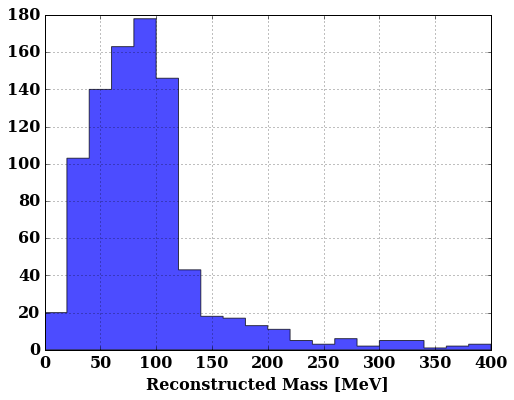

In [3]:
 plt.figure(figsize=(8,6))
counts,edges,_ = plt.hist(dfs._pi0_mass.values,bins=20,range=(0,400),histtype='stepfilled',alpha=0.7)
plt.grid(True)
plt.xlabel('Reconstructed Mass [MeV]',fontsize=16,weight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
print counts

In [4]:
# plt.figure(figsize=(8,6))
# counts,edges,_ = plt.hist(dfs._pi0_mass.values,bins=60,range=(0,250),histtype='stepfilled',alpha=0.7)
# plt.grid(True)
# plt.xlabel('Reconstructed Mass [MeV]',fontsize=16,weight='bold')
# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)
# print counts

In [5]:
#name = 'singleshower'
name = 'pi0'
#name = 'sel2'
stage = 'pi0'
#stage = 'singleshower'

f = '/Volumes/UBooNEDataMCC8/MCC8_3/AnaFiles/MCBNBCos/BT_backgrounds_%s.root'%stage
on ='/Volumes/UBooNEDataMCC8/MCC8_3/AnaFiles/OnBeam/BT_backgrounds_%s.root'%stage
off='/Volumes/UBooNEDataMCC8/MCC8_3/AnaFiles/OffBeam/BT_backgrounds_%s.root'%stage

t = rn.root2array(f,treename='tree')
df = pd.DataFrame(t)

a = rn.root2array(on,treename='tree')
df0 = pd.DataFrame(a)

b = rn.root2array(off,treename='tree')
df1 = pd.DataFrame(b)

stage = 'pi0signalonly'

In [6]:
oth_v = df.query('bkgd_id == 0') #noise
cos_v = df.query('bkgd_id == 1')
cc1pi0_v = df.query('bkgd_id == 2')
nc1pi0_v = df.query('bkgd_id == 3')
cc1pi0_outFV_v = df.query('bkgd_id == 4')
multpi0_v = df.query('bkgd_id == 5')
nue_v = df.query('bkgd_id == 6')
antinumu_v = df.query('bkgd_id == 7')
cccex_v = df.query('bkgd_id == 8 ')
nccex_v = df.query('bkgd_id == 9')
ccgamma_v = df.query('bkgd_id == 10')
kaon_v = df.query('bkgd_id == 11')
ccoth_v = df.query('bkgd_id == 12 or bkgd_id == 11')
ncoth_v = df.query('bkgd_id == 13 or bkgd_id == 9')

all_but_sig_v = df.query('bkgd_id != 2')

dataPOT = 0.492
mcbnbcos_POT = 4.23214
off_to_on = 2.168404449
mc_to_onbeam = dataPOT/mcbnbcos_POT

var = 'mu_startx'

sig_w = [ mc_to_onbeam for i in xrange(len(cc1pi0_v[var].values)) ] 

cos_ext_w = [ off_to_on for i in xrange(df1.shape[0]) ] 
all_w = [ mc_to_onbeam for i in xrange(len(df[var].values)) ] 

In [18]:
def makeOnOffPlots(var,xmin,xmax,nbins=20,xlabel='',includepot=False):

    x_on, y_on = np.histogram(df0[var].values,bins=nbins,range=(xmin,xmax))
    x_off, y_off = np.histogram(df1[var].values,bins=nbins,range=(xmin,xmax))
    x_mc_sig, y_mc_sig = np.histogram(cc1pi0_v[var].values,bins=nbins,range=(xmin,xmax))
    x_mc_bkgd, y_mc_bkgd = np.histogram(all_but_sig_v[var].values,bins=nbins,range=(xmin,xmax))
    
    bins = (y_off[:-1] + y_off[1:])/2
    bin_width = bins[1]-bins[0]

    bnbcos_sig     = x_mc_sig * mc_to_onbeam 
    on_min_off_mc  = x_on - x_off * off_to_on - x_mc_bkgd * mc_to_onbeam
    
    err_mc_sig = np.sqrt(x_mc_sig) * mc_to_onbeam
    err_on = np.sqrt(x_on)
    err_off = np.sqrt(x_off) * off_to_on
    err_mc_bkgd = np.sqrt(x_mc_bkgd) * mc_to_onbeam
    err_on_off_mc = np.sqrt(err_on*err_on + err_off*err_off + err_mc_bkgd*err_mc_bkgd)

    #print err_mc_bkgd
    weights = [sig_w]
    
    lgd = 0
    
    labels_tst = ['$\\nu_{\mu}$ CC 1 $\pi^0$']
    colors_tst = ['salmon'] 

    fig,ax = plt.subplots(figsize=(8,6))
    spi0_w = [0.08 for i in xrange(len(dfs._pi0_mass.values))]
    
    #dfs_w_smear_post_sel2
    out = ax.hist([cc1pi0_v[var].values],bins=nbins,label=labels_tst,color=colors_tst,ec='None',\
        range=(xmin,xmax),weights=weights,rwidth=bin_width,histtype='stepfilled')
    plt.bar(bins - bin_width/2,err_mc_sig*2,width=bin_width,bottom = bnbcos_sig - err_mc_sig,\
        alpha=.5,  fill=False, linewidth=0,hatch='\\\\\\\\')
    plt.errorbar(bins,on_min_off_mc,xerr=bin_width/2,yerr=err_on_off_mc,fmt='ko',label='Data - Backgrounds',markersize=6,lw=1.5)
    _,_,_ = plt.hist(dfs._pi0_mass.values,bins=nbins,range=(xmin,xmax),lw=2,weights=spi0_w,histtype='step',label='$\\nu_{\mu}$ CC 1 $\pi^0$, NO IP')
    #_,_,_ = plt.hist(dfs_w_smear._pi0_mass.values,bins=nbins,range=(xmin,xmax),color='g',lw=3,weights=spi0_w_smear_w,histtype='step',label='Single $\pi^0$ (w/o Cos), $\pi^0$ Vtx Smear ')
    #_,_,_ = plt.hist(dfs_w_smear_post_sel2._pi0_mass.values,bins=nbins,range=(xmin,xmax),color='g',lw=2,weights=spi0_w_smear_post_sel2_w,histtype='step',label='Single $\pi^0$ (w/o Cos), Vtx Smear')
    #_,_,_ = plt.hist(dfs_w_smear_getrandom._pi0_mass.values,bins=nbins,range=(xmin,xmax),color='g',lw=2,weights=spi0_w_smear_getrandom_w,histtype='step',label='Single $\pi^0$ (w/o Cos), Vtx Smear')
    #_,_,_ = plt.hist(dfs_ccpi0._pi0_mass.values,bins=nbins,range=(xmin,xmax),color='purple',lw=2,weights=ccpi0_w,histtype='step',label='Single $\pi^0$ (w/ Cos)')
    
    
    handles,labels = ax.get_legend_handles_labels()
    lgd = plt.legend(handles=handles,fontsize=14,loc='upper left',bbox_to_anchor=(0.34,0.8))
    lgd._legend_box.align = "left"
    
    plt.grid(True)
    plt.xlabel(xlabel,fontsize=18,weight='bold')
    plt.ylabel('Events',fontsize=18,weight='bold')
    plt.ylim(0)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    plt.xlim(xmin,xmax)
    
    plt.savefig('Plots/Physics_%s_onoffseparate_%s.png'%(stage,var),bbox_extra_artists=(lgd,), bbox_inches='tight')

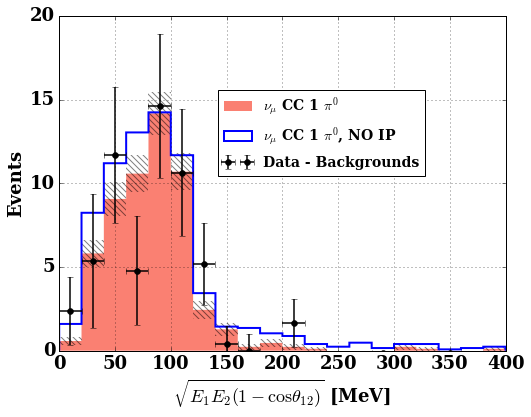

In [19]:
makeOnOffPlots('pi0_mass',0,400,xlabel='$\sqrt{E_1 E_2 (1-\cos\\theta_{12})}$ [MeV]',includepot=True)
